# Assignment 4 - Feature Extraction for Advanced Vision Problems

by Bryan Carr

21 November, 2022

for University of San Diego's AAI 521 - Computer Vision

Prof Siamak Aram


This assignment will examine some feature extraction techniques in image processing.

##**Part 1- Feature extraction**

In [103]:
# Import key libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [104]:
# Mount drive where images are located
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


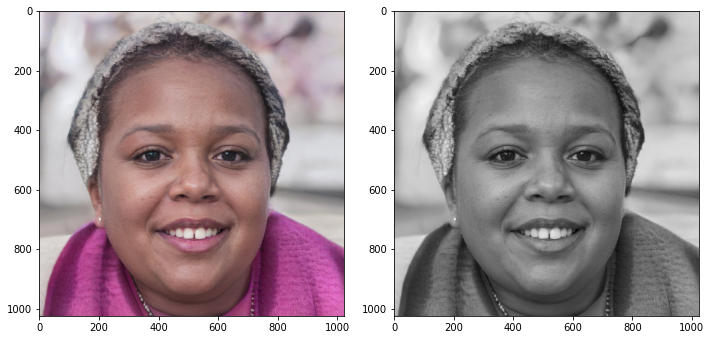

In [105]:
# Read the original image pic1 and create a regular plus a gray version of it. 
# The result should be similar to what you see in instrcutions

# Read in the Image and Recolour it
img1 = cv2.imread('/content/drive/MyDrive/AAI 521 CV/Assignment4_pic1.jpg')
img1_colour = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


f = plt.figure(figsize=(10,5))
f.add_subplot(1, 2, 1)
plt.imshow(img1_colour)

f.add_subplot(1,2,2)
plt.imshow(img1_gray, cmap='gray')

plt.tight_layout()
plt.show(f)

In [106]:
#a- SIFT
sift = cv2.xfeatures2d.SIFT_create()


In [108]:
# Find detect and compute function and apply it on top of sift
original_keypoints, original_descriptor = sift.detectAndCompute( img1_gray, None)
keypoints_without_size = np.copy(img1_colour)

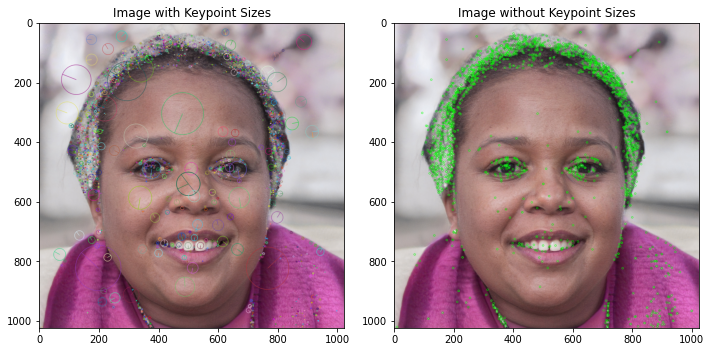

In [109]:
# Draw the result here
result1 = None
result2 = None

result1 = cv2.drawKeypoints(img1_colour, original_keypoints, result1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result2 = cv2.drawKeypoints(img1_colour, original_keypoints, keypoints_without_size, color = (0, 255, 0))
#cv2.drawKeypoints()

f = plt.figure(figsize=(10,5))
f.add_subplot(1,2,1)
plt.title("Image with Keypoint Sizes")
plt.imshow(result1)

f.add_subplot(1,2,2)
plt.title("Image without Keypoint Sizes")
plt.imshow(result2)

plt.tight_layout()
plt.show(f)

We can see that with the keypoint sizes, each point is plotted with a radius. Without sizes, the points are small green dots. We can see that the same points are plotted in both images (for example, on her forehead, eyebrows, and above her head on the background).

In [110]:
# b- FAST
fast = cv2.FastFeatureDetector_create() 

# Find detect and compute function and apply it on top of fast
keypoints_with_nonmax = fast.detect(img1_gray, None)
image_with_nonmax = np.copy(img1_colour)


fast.setNonmaxSuppression(False)
keypoints_without_nonmax = fast.detect(img1_gray, None)
image_without_nonmax = np.copy(img1_colour)

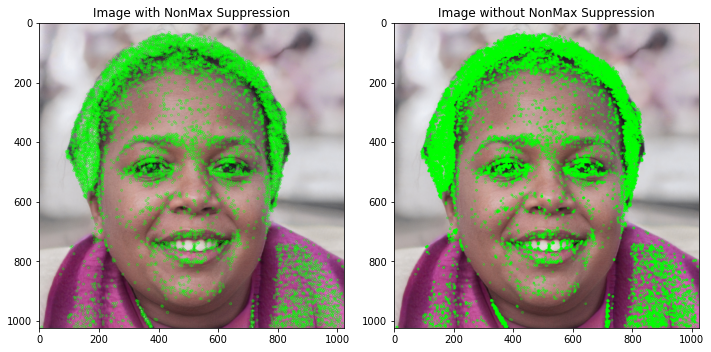

In [111]:
# Draw the result
# Use above approach to create result 1 and result 2 and draw them
result1 = None
result2 = None

result1 = cv2.drawKeypoints(img1_colour, keypoints_with_nonmax, image_with_nonmax, color = (0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result2 = cv2.drawKeypoints(img1_colour, keypoints_without_nonmax, image_without_nonmax, color = (0, 255, 0))#, flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

f = plt.figure(figsize=(10,5))
f.add_subplot(1,2,1)
plt.title("Image with NonMax Suppression")
plt.imshow(result1)

f.add_subplot(1,2,2)
plt.title("Image without NonMax Suppression")
plt.imshow(result2)

plt.tight_layout()
plt.show(f)

We can easily see that the non-max suppression is filtering out some of the points, reducing clutter in the detector. When it is turned off, there are more points detected and plotted.

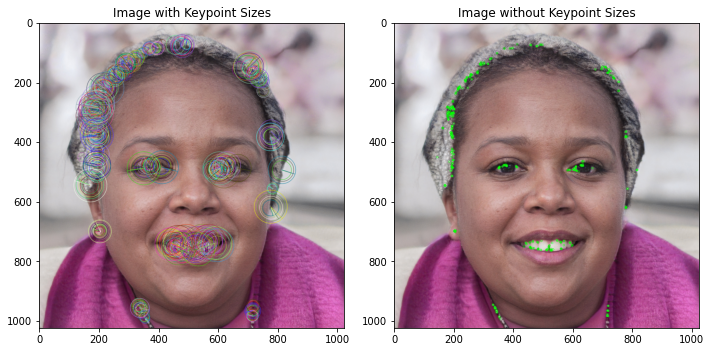

In [112]:
# c- ORB
orb = cv2.ORB_create()
original_keypoints, original_descriptor = orb.detectAndCompute(img1_gray, None)
query_keypoints, query_descriptor = orb.detectAndCompute(img1_gray, None)
keypoints_without_size = np.copy(img1_colour)
keypoints_with_size = np.copy(img1_colour)

# Draw the result
# Use above approach to create result 1 and result 2 and draw them
result1 = None
result2 = None

result1 = cv2.drawKeypoints(img1_colour, original_keypoints, keypoints_with_size, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
result2 = cv2.drawKeypoints(img1_colour, query_keypoints, keypoints_without_size, color = (0, 255, 0))

f = plt.figure(figsize=(10,5))
f.add_subplot(1,2,1)
plt.title("Image with Keypoint Sizes")
plt.imshow(result1)

f.add_subplot(1,2,2)
plt.title("Image without Keypoint Sizes")
plt.imshow(result2)

plt.tight_layout()
plt.show(f)

Similar to the SIFT algorithm, we can see the keypoint sizes plotted on the left, and replaced with dots on the right. It is less clear, as there is significant overlap, but again by turning off the flag to draw the matching keypoints we are only seeing a dot at the centre of the point.

We can also see that ORB is more effective at finding keypoints in the area of note - the woman's face. SIFT was detecting many keypoints in the background.

The number of matching keypoints between the original and the query image is 500



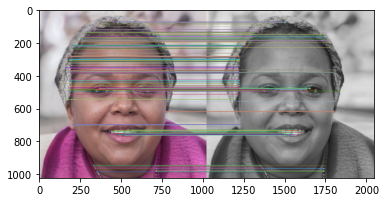

In [113]:
#d- Finding the matching points
brute_force = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = brute_force.match(original_descriptor, query_descriptor)
matches = sorted(matches, key = lambda x : x.distance)
result = cv2.drawMatches(img1_colour, original_keypoints, img1_gray, query_keypoints, matches, img1_gray, flags = 2)
plt.imshow(result)
print("The number of matching keypoints between the original and the query image is {}\n".format(len(matches)))

We can see the key poitns from the ORB detections are matched up in the two images with straight lines between them.

**Part 2- Face recognition**

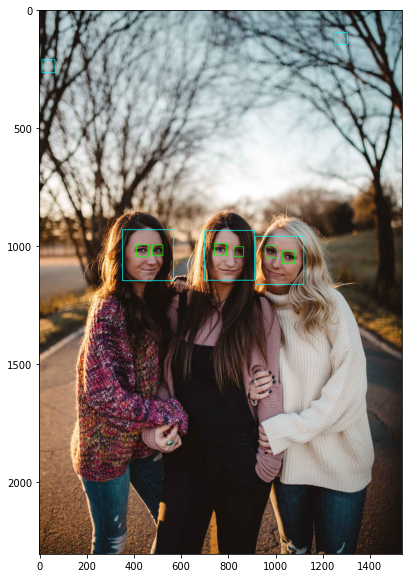

In [114]:
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/AAI 521 CV/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/AAI 521 CV/haarcascade_eye.xml")

img = cv2.imread("/content/drive/MyDrive/AAI 521 CV/Assignment4_pic2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img1 = cv2.rectangle(img,(x, y),(x + w, y + h),(255,255,0),2)
    roi_gray = gray[y: y + h, x: x + w]
    roi_color = img[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey), (ex + ew, ey + eh), (0,255,0),2)

# Plot with PyPlot to reduce the size. This requires converting to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
#cv2_imshow(img)

In [115]:
#b- Working on webcam
#Function to activate your laptop cam. This function is comp;ete and you don't need to do anything.
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

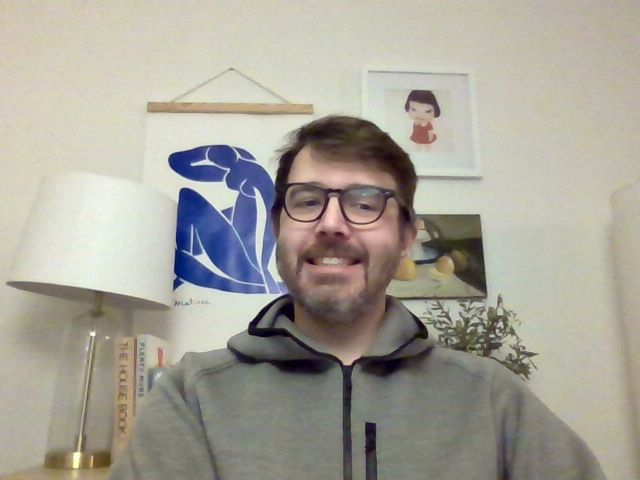

In [116]:
# Here we call the function and open the camera
# Call function and open the camera
image_file = take_photo(filename='photo.jpg')

#Show the read image
img = cv2.imread(image_file)

cv2_imshow(img)


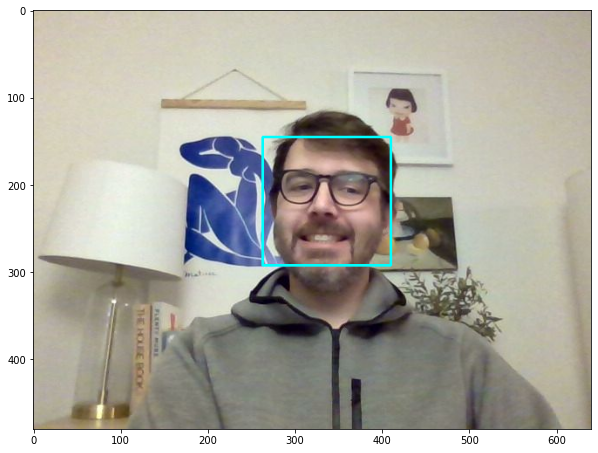

In [117]:
#Repeat the above code to detect the face and eyes in your image
# Here you should see your image while the face and eyes are detected
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    img1 = cv2.rectangle(img,(x, y),(x + w, y + h),(255,255,0),2)
    roi_gray = gray[y: y + h, x: x + w]
    roi_color = img[y: y + h, x: x + w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey), (ex + ew, ey + eh), (0,255,0),2)

# Plot with PyPlot to reduce the size. This requires converting to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)

I chose this area of my home as it has some artwork with faces in it. Thankfully they were not detected, which indicates some robustness to overlook the illustrations.

Also interesting is that it was not able to detect my eyes past my glasses - something that could maybe be improved on.

**Part 3- Parameter detection**

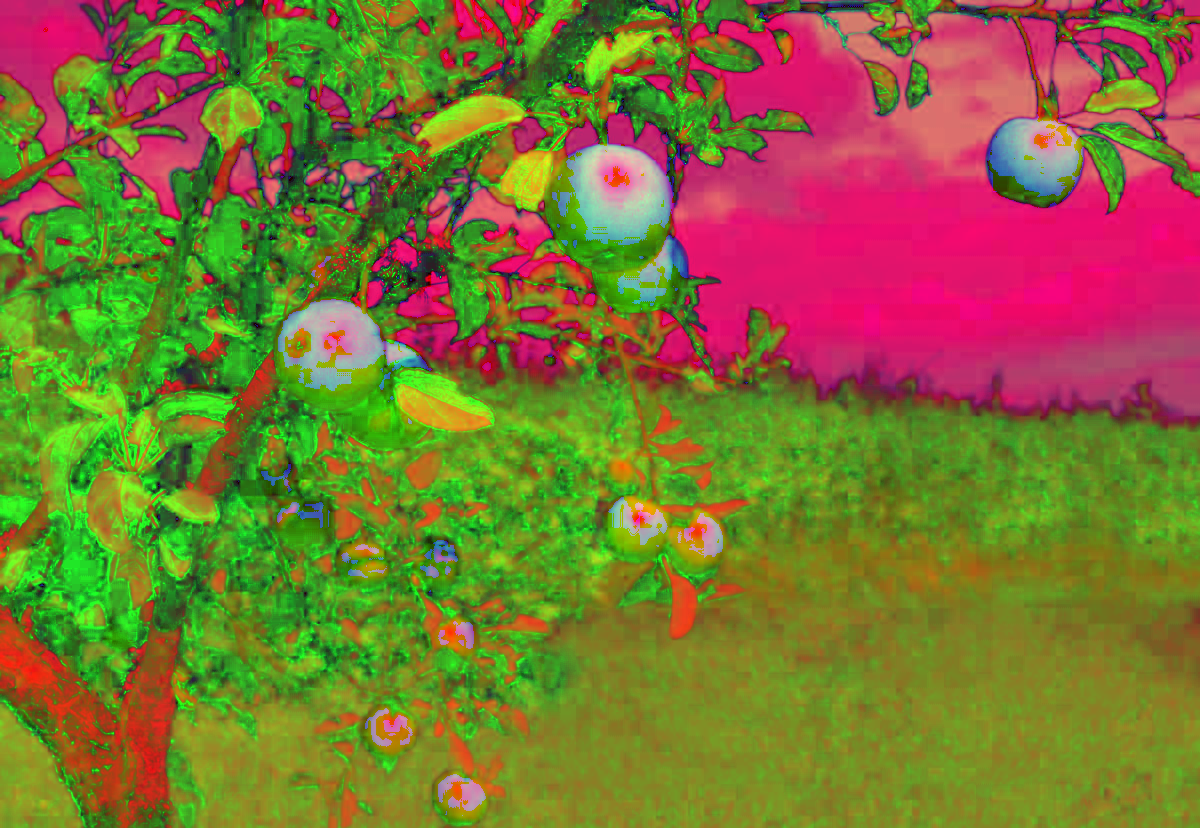

In [118]:
lowerBound=np.array([170,100,80])
upperBound=np.array([180,256,256])

#cam= cv2.VideoCapture(0)
kernelOpen=np.ones((5,5))
kernelClose=np.ones((20,20))

font = cv2.FONT_HERSHEY_SIMPLEX

img=cv2.imread('/content/drive/MyDrive/AAI 521 CV/apple.jpg')

#convert BGR to HSV
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Show this image

cv2_imshow(imgHSV)

Mask Close:


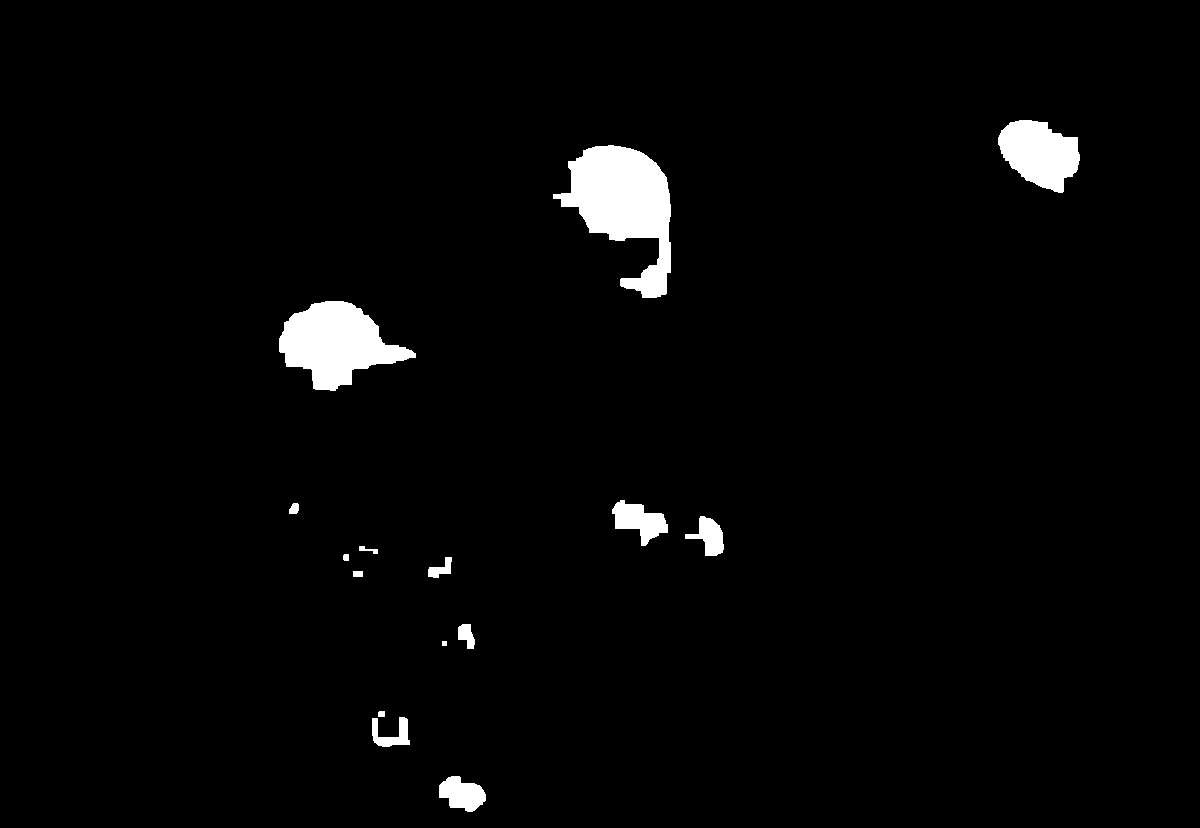


 Mask Open:


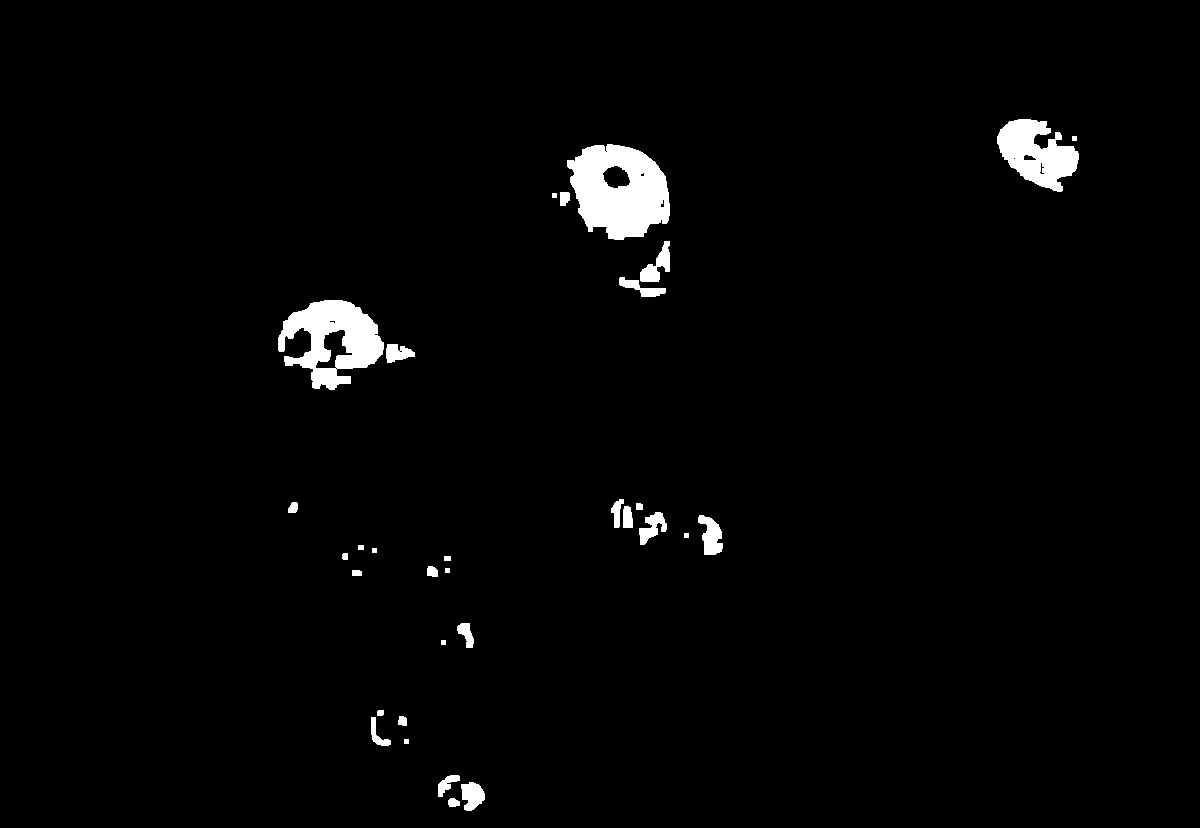


 Mask:


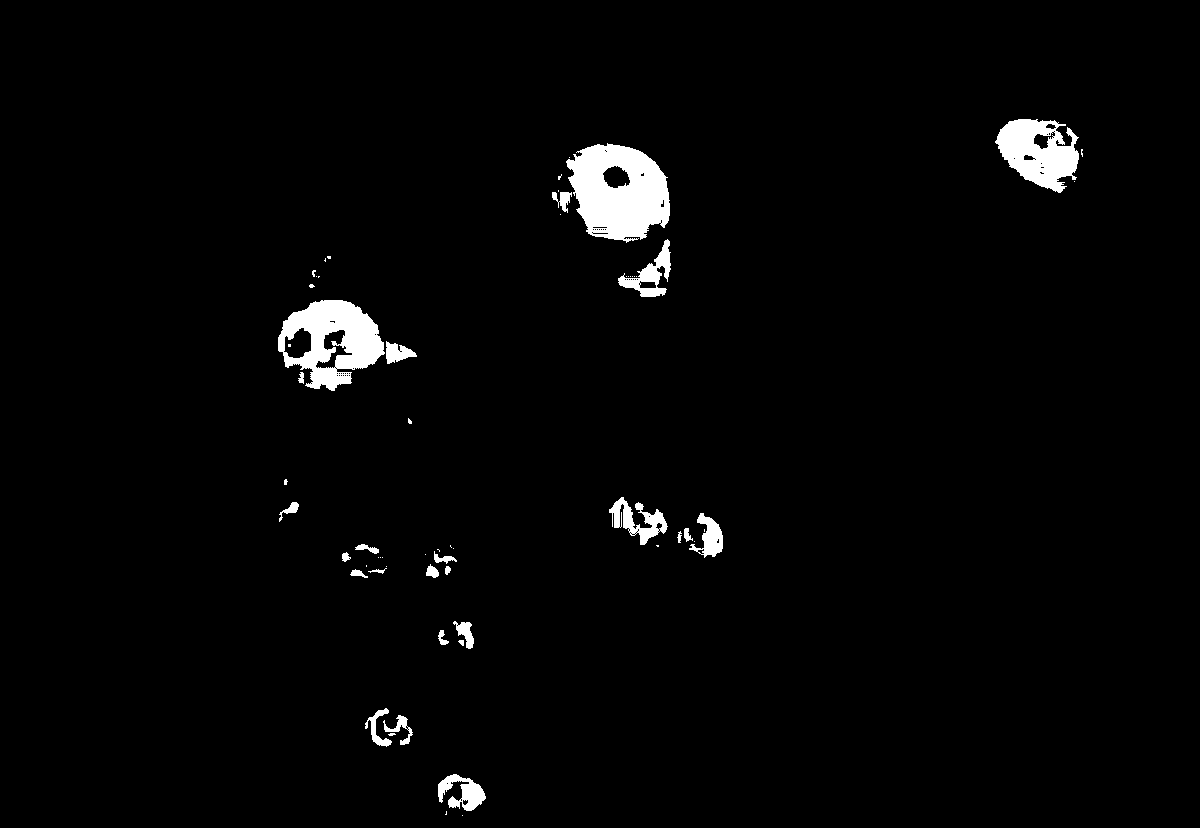


 Image with Counts:


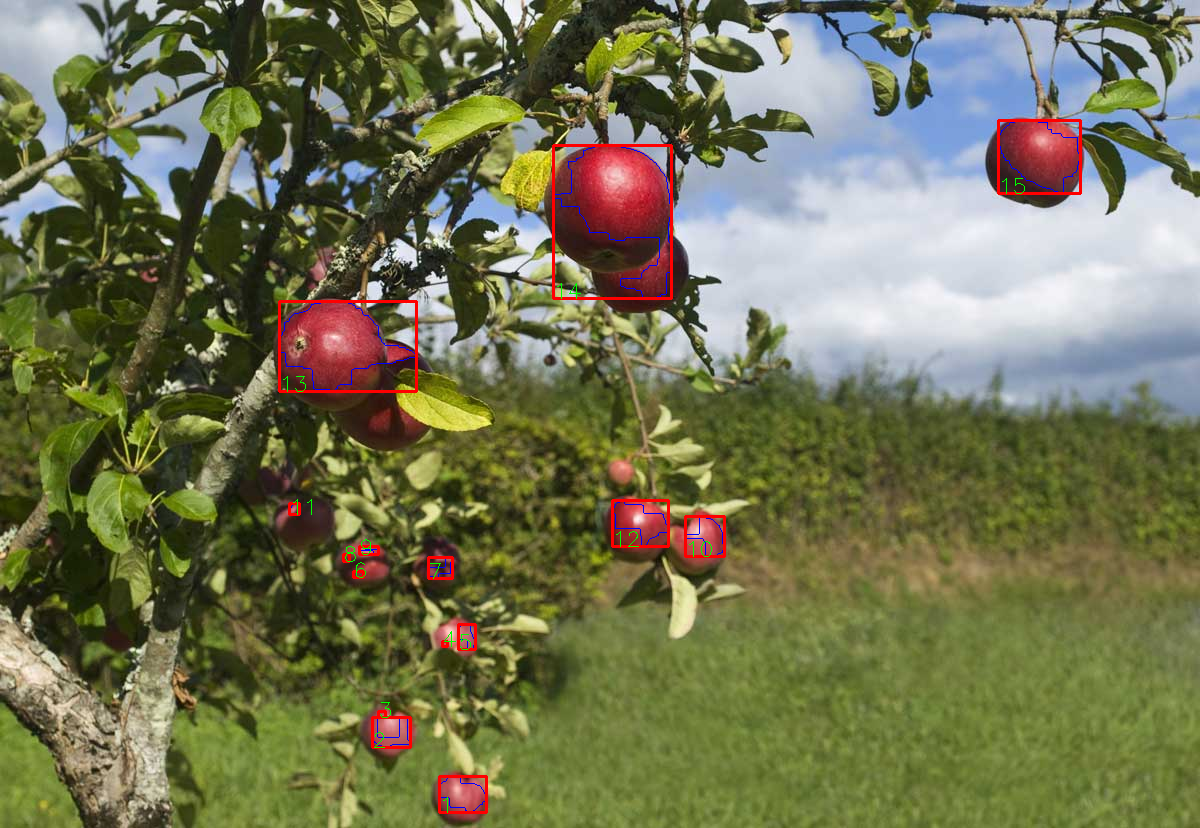

In [119]:
# create the Mask
mask=cv2.inRange(imgHSV,lowerBound,upperBound)
#morphology
maskOpen=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernelOpen)
maskClose=cv2.morphologyEx(maskOpen,cv2.MORPH_CLOSE,kernelClose)

maskFinal=maskClose
conts,h=cv2.findContours(maskFinal.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

cv2.drawContours(img,conts,-1,(255,0,0),1)
for i in range(len(conts)):
    x,y,w,h=cv2.boundingRect(conts[i])
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255), 2)
    cv2.putText(img, str(i+1),(x,y+h),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0))
    
print("Mask Close:")
cv2_imshow(maskClose)
print("\n Mask Open:")
cv2_imshow(maskOpen)
print("\n Mask:")
cv2_imshow(mask)
print("\n Image with Counts:")
cv2_imshow(img)

In [120]:
print( 'I counted ', 18, ' apples in this picture') #Print number of apples

I counted  18  apples in this picture
